In [41]:
import numpy
import scipy.ndimage
import PIL.Image
import matplotlib.pyplot as pyplot
import torch
import torch.utils.data
import torch.nn
import torchvision as vision
import torchvision.transforms
import pandas

# Example Image

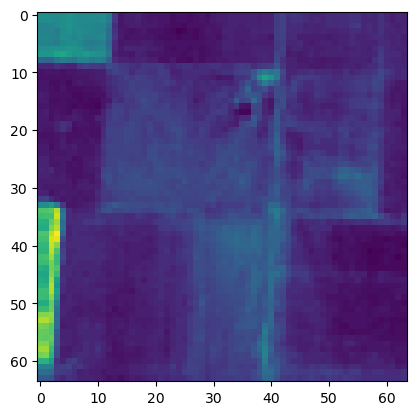

In [2]:
img = PIL.Image.open("dataset/AnnualCrop/AnnualCrop_1.jpg")
img = img.convert(mode="L")
size = img.size
data = numpy.array(img.getdata()).reshape((size[0], size[1]))
pyplot.imshow(data)

# Harris Corner Detection

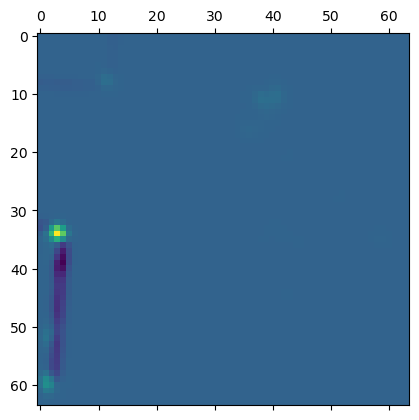

In [3]:
SIGMA = 1
ALPHA = 0.04
sobel_v = scipy.ndimage.sobel(data / 255.0, 0)
sobel_h = scipy.ndimage.sobel(data / 255.0, 1)
I_x2 = scipy.ndimage.gaussian_filter(sobel_h ** 2, SIGMA)
I_y2 = scipy.ndimage.gaussian_filter(sobel_v ** 2, SIGMA)
I_xy = scipy.ndimage.gaussian_filter(sobel_h * sobel_v, SIGMA)
M_det = I_x2 * I_y2 - I_xy ** 2
M_trc = (I_x2 + I_y2) ** 2
harris = M_det - ALPHA * M_trc
pyplot.matshow(harris)

# Dataloader

In [42]:
BATCH_SIZE = 64

def transform(image: PIL.Image.Image):
    width, height = image.size
    data = image.getdata()
    data = torch.Tensor(data).reshape((width, height, 3))
    return data


dataset = vision.datasets.ImageFolder(root="dataset", transform=vision.transforms.ToTensor)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

print(f"The dataset has {len(dataset)} samples.")

The dataset has 27000 samples.


# Training And Testing Dataset

In [35]:
train_csv = pandas.read_csv("dataset/train.csv", dtype={"": int, "Filename": str, "Label": int, "Classname": str})
test_csv = pandas.read_csv("dataset/test.csv", dtype={"": int, "Filename": str, "Label": int, "Classname": str})

print(f"The train set has {len(train_csv)} rows.")
print(f"The test set has {len(test_csv)} rows.")
train_csv.head(5)

The train set has 18900 rows.
The test set has 2700 rows.


,Unnamed: 0,Filename,Label,ClassName
0,16257,AnnualCrop/AnnualCrop_142.jpg,0,AnnualCrop
1,3297,HerbaceousVegetation/HerbaceousVegetation_2835...,2,HerbaceousVegetation
2,17881,PermanentCrop/PermanentCrop_1073.jpg,6,PermanentCrop
3,2223,Industrial/Industrial_453.jpg,4,Industrial
4,4887,HerbaceousVegetation/HerbaceousVegetation_1810...,2,HerbaceousVegetation
